# ESTUDIO NETFLIX

En los tiempos que corren actualmente, existen diferentes plataformas que ofrecen servicios en streaming con el objetivo de satisfacer las necesidades de entretenimiento que surgen entre la población. Netflix, fundada en 1997, empezó como una empresa que ofrecía servicios de alquiler de DVD por correo, evolucionando hacia la transmisión online para adaptarse a los tiempo actuales, convirtiéndose así en una de las plataformas de transmisión más grandes y conocidas a nivel mundial. 

In [1]:
#Importar bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ruta_archivo_csv = 'netflix_data.csv'

datos = pd.read_csv(ruta_archivo_csv)

#Ejecutamos la cabecera para comprobar que devuelve la tabla adecuada

datos.head()

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN
1,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0
3,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0
4,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0


A partir de los datos disponibles, en este notebook intentaremos responder algunas de las preguntas más relevantes sobre una de las plataformas más famosas en la actualidad. 

### ¿CUÁL ES EL FORMATO DE CONTENIDO MÁS COMÚN?

¿Qué tipo de contenido nos encontraremos si nos subscribimos a Netflix? ¿Qué formato es el más común? 

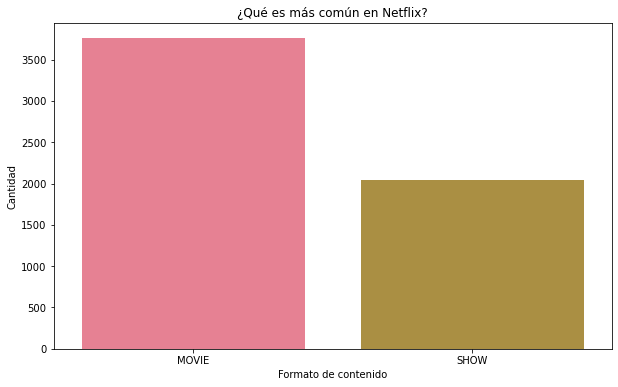

In [2]:
nueva_paleta = "husl"
sns.set_palette(nueva_paleta)

conteo_por_tipo = datos['type'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=conteo_por_tipo.index, y=conteo_por_tipo.values)

plt.title('¿Qué es más común en Netflix?')
plt.xlabel('Formato de contenido')
plt.ylabel('Cantidad')

plt.show()

Tras el gráfico podemos saber que el tipo de contenido que abunda en la plataforma de Netflix son las películas.

In [12]:
import pandas as pd

# Cargar el CSV
df = pd.read_csv('netflix_data.csv')

# Dividir los valores de la columna 'genres' y crear un nuevo DataFrame
genres_df = df['genres'].apply(eval).apply(pd.Series, dtype='object').stack().reset_index(level=1, drop=True).to_frame('genre').reset_index()


### ¿CUÁL ES EL GÉNERO MÁS FRECUENTE?

A través de este análisis podemos observar que el género más frecuente en la plataforma es el drama, seguido por la comedia y thriller. 

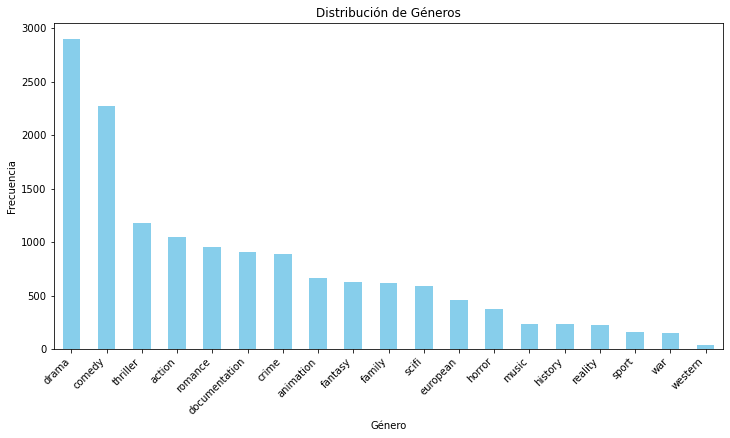

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Frecuencia de género

genres_counts = genres_df['genre'].value_counts()

# Gráfico de barras

plt.figure(figsize=(12, 6))
genres_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de Géneros')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()

### ¿Cuál es el TOP 10 de los países de producción?

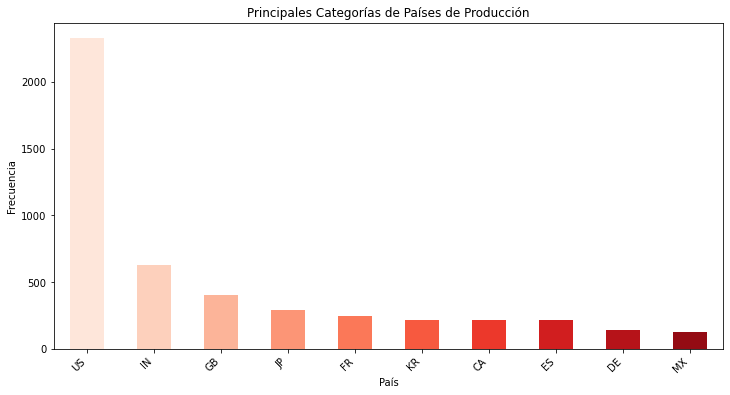

In [16]:
# Separamos países y contamos frecuencia
countries_counts = df['production_countries'].apply(eval).explode().value_counts()

# top 10
top_countries = countries_counts.head(10)

colors = sns.color_palette("Reds", len(top_countries))

plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar', color=colors)
plt.title('Principales Categorías de Países de Producción')
plt.xlabel('País')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()

Podemos observar que como era de esperar, US es el país en el que más categorías se producen. 

### ¿Cuál es el contenido con mejor calidad?

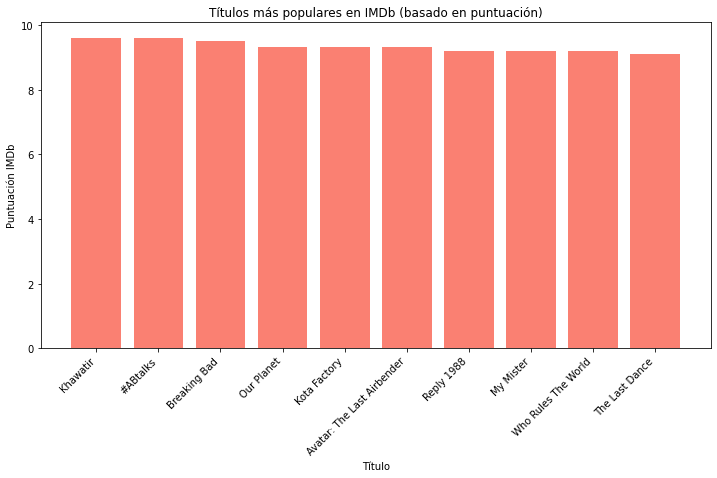

In [20]:

# Ordena el DataFrame por la puntuación IMDb de forma descendente
df_sorted_by_score = df.sort_values(by='imdb_score', ascending=False)

top_titles = df_sorted_by_score[['title', 'imdb_score']].head(10)

# Crea un gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(top_titles['title'], top_titles['imdb_score'], color='salmon')
plt.title('Títulos más populares en IMDb (basado en puntuación)')
plt.xlabel('Título')
plt.ylabel('Puntuación IMDb')
plt.xticks(rotation=45, ha='right')
plt.show()



Podemos visualizar los 10 títulos con mejor puntuación, la cual refleja su contenido y popularidad. 
Sin embargo, si nos basamos en el número de votos, el resultado es el siguiente:

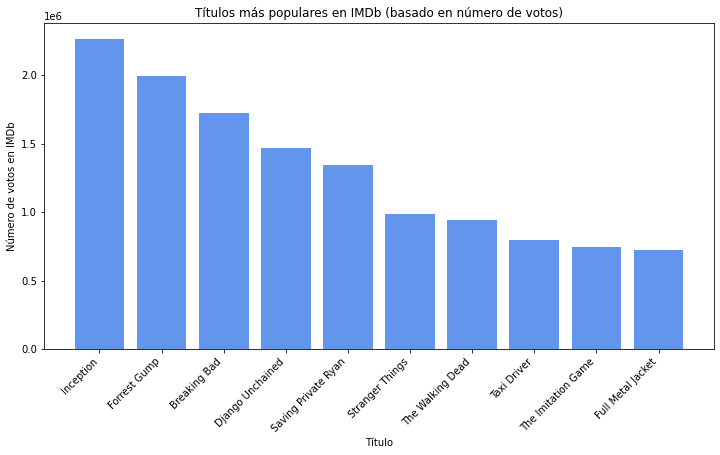

In [22]:
df_sorted_by_votes = df.sort_values(by='imdb_votes', ascending=False)

top_titles = df_sorted_by_votes[['title', 'imdb_votes']].head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_titles['title'], top_titles['imdb_votes'], color='cornflowerblue')  # Puedes cambiar 'cornflowerblue' por otro color
plt.title('Títulos más populares en IMDb (basado en número de votos)')
plt.xlabel('Título')
plt.ylabel('Número de votos en IMDb')
plt.xticks(rotation=45, ha='right')
plt.show()


Podemos ver que la lista del top 10 está liderada por 'Inception', según el número de votos que ha recibido cada contenido, indicando la participación de los espectadores y la popularidad.

### CONCLUSIÓN

Tras los primeros análisis sabemos que podemos encontrarnos que el formato de contenido en una plataforma como Netflix puede ser el de película como el de shows, siendo más popular el primero de éstos. En cuanto a los géneros, el que más abunda sería el drama, comedia y thriller, mientras los que menos serían los relacionados con el deporte, la guerra y occidental. 

En cuanto al país en el que más se produce estaría US, con una gran diferencia, seguido por India e Inglaterra.

Por último, podemos concluir en que la popularidad de un título podemos medirla a través de dos vías: la calidad percibida y la participación de la audiencia. Además, algunos títulos pueden ser percibidos como de alta calidad, mientras que otros pueden atraer a una audiencia más amplia, independientemente de su puntuación. Para poder profundizar en esta perspectiva, sería necesario realizar pruebas de correlación u otros métodos.